In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Bài toán phân loại (Logictic Regression)
 


### Giá trị dự đoán của model
$\hat{y}_1 = \sigma(w_0 + w_1.x_1^{(1)} + ... + w_m.w_m^{(1)})$  
...  
$\hat{y}_i = \sigma(w_0 + w_1.x_1^{(i)} + ... + w_m.w_m^{(i)})$  
...  
$\hat{y}_N = \sigma(w_0 + w_1.x_1^{(N)} + ... + w_m.w_m^{(N)})$  

Với: $\sigma(x) = \frac{1}{1 + e^{-x}}$  
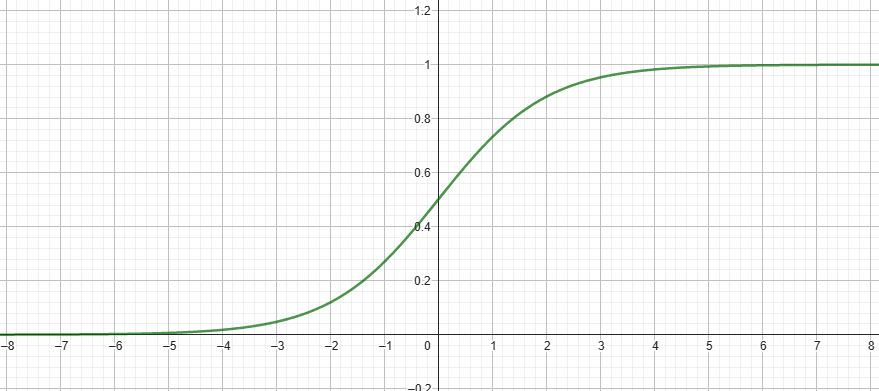

Ta có thể sử dụng ma trận để viết lại công thức gọn hơn.  

Đặt:  
+ $Y = \begin{bmatrix} y_1 & y_2 & ... & y_N \end{bmatrix}^T$   
+ $X = \begin{bmatrix} 1 & x_1 & ... & x_m \end{bmatrix}^T$  
+ $W = \begin{bmatrix} w_0 & w_1 & ... & w_m \end{bmatrix}^T$  

Khi đó: $Y = \sigma(X \times W)$  


In [2]:
# Định nghĩa hàm sigmoid(x)
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

In [3]:
# Giá trị dự đoán của model
def predict(w, inp):
    inp = np.hstack((np.ones((inp.shape[0], 1)), inp))
    return sigmoid(inp @ w)


In [4]:
# Hàm mất mát
def get_loss_function(w, data):
    X = data[:, :-1]
    y = data[:, -1].reshape(-1, 1)
    Y = predict(w, X)
    return - np.sum(y * np.log(Y) + (1 - y) * np.log(1 - Y))

In [5]:
# Vector gradient tại một điểm point, với tham số đầu vào là data
def gradient(point, data):
    X = data[:, :-1]
    y = data[:, -1].reshape(-1, 1)
    Y = predict(point, X)
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X.T @ (Y - y)


In [6]:
class Model:
    def __init__(self):
        self.w = None
        self.loss_function = None

    def gen_model(self, data):
        self.w = np.random.uniform(0, 1, data.shape[1]).reshape(-1, 1)

    def cal_loss_function(self, data):
        self.loss_function = get_loss_function(self.w, data)

    def cal_value(self, inp):
        return predict(self.w, inp)

    def show(self):
        print(f"w: {self.w.reshape(1, -1)}")
        print(f"loss_function: {self.loss_function}")

In [7]:
def train(model, data, learn_rate, max_inter):
    model.gen_model(data)
    history = []
    for i in range(max_inter):
        model.w -= learn_rate * gradient(model.w, data)
        model.cal_loss_function(data)
        history.append(model.loss_function)
        if model.loss_function < 1e-10:
            break
    return model, history


In [8]:
data = np.array([[1, 3, 0], [3, 1, 0], [2, 2, 0], [4, 2, 0],
                 [2, 5, 1], [3, 4, 1], [5, 4, 1], [5, 3, 1]])

model = Model()
learn_rate = 0.0005
max_inter = 10000

model, history = train(model, data, learn_rate, max_inter)

for i in range(len(history)):
    print(f"Generation {i}, loss_function = {history[i]}")

print("w: ", model.w)
print("Loss function: ", model.loss_function)


Generation 0, loss_function = 19.88581193698362
Generation 1, loss_function = 19.797343955148143
Generation 2, loss_function = 19.70890919557605
Generation 3, loss_function = 19.620508398212607
Generation 4, loss_function = 19.532142319935982
Generation 5, loss_function = 19.44381173495188
Generation 6, loss_function = 19.35551743519617
Generation 7, loss_function = 19.26726023074714
Generation 8, loss_function = 19.179040950246335
Generation 9, loss_function = 19.0908604413303
Generation 10, loss_function = 19.002719571070507
Generation 11, loss_function = 18.914619226424023
Generation 12, loss_function = 18.82656031469429
Generation 13, loss_function = 18.73854376400152
Generation 14, loss_function = 18.65057052376438
Generation 15, loss_function = 18.562641565191438
Generation 16, loss_function = 18.474757881784015
Generation 17, loss_function = 18.38692048985002
Generation 18, loss_function = 18.299130429028338
Generation 19, loss_function = 18.21138876282545
Generation 20, loss_fu

In [9]:
inp = np.array([[6, 2], [5.5, 2]])
print(model.cal_value(np.array(inp)))

[[0.51591501]
 [0.487725  ]]
